In [60]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]


In [61]:
data = pd.read_csv('Fraud.csv',sep=',')
data.head(50)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Checking for any null values in the dataset.

In [63]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

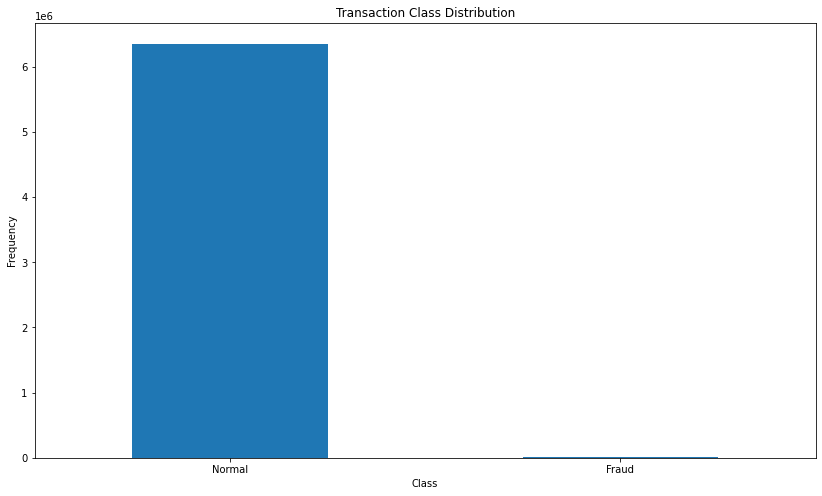

In [64]:
count_classes = pd.value_counts(data['isFraud'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)#for naming 0 as normal and 1 as fraud

plt.xlabel("Class")

plt.ylabel("Frequency")

# In this dataset the outliers will be the fraud transactions

In [65]:
## Get the Fraud and the normal dataset 

fraud = data[data['isFraud']==1]

normal = data[data['isFraud']==0]

In [66]:
print(fraud.shape,normal.shape)

(8213, 11) (6354407, 11)


In [67]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [68]:
normal.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [69]:
from sklearn.preprocessing import StandardScaler
numerical_cols = [cols for cols in data.columns if data[cols].dtype in [int,float] and cols!='isFraud']
scaler = StandardScaler()
scaler.fit(data[numerical_cols])
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Dropping out unnecessary features as they do not contribute to the model.

In [70]:
data = data.drop(['nameOrig','nameDest','step'],axis=1)
data = pd.get_dummies(data,columns=['type'],prefix='type')
data 

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0,0,0,0,1,0
1,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0,0,0,0,1,0
2,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,0,0,0,0,0,1
3,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,0,0,1,0,0,0
4,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,0.264665,-0.171108,-0.292442,-0.323814,-0.240959,1,0,0,1,0,0,0
6362616,10.153953,1.896491,-0.292442,-0.323814,-0.333411,1,0,0,0,0,0,1
6362617,10.153953,1.896491,-0.292442,-0.303665,1.403027,1,0,0,1,0,0,0
6362618,1.109765,0.005581,-0.292442,-0.323814,-0.333411,1,0,0,0,0,0,1


In [71]:
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(636262, 12)

In [72]:
data.shape

(6362620, 12)

In [73]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['isFraud']==1]

Valid = data1[data1['isFraud']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [74]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0012888646188564514
Fraud Cases : 819
Valid Cases : 635443


# Checking for collinearity between multiple independent features, if we wish we could remove one of the features that have a high collinearity but not removinng does not effect the result a lot.

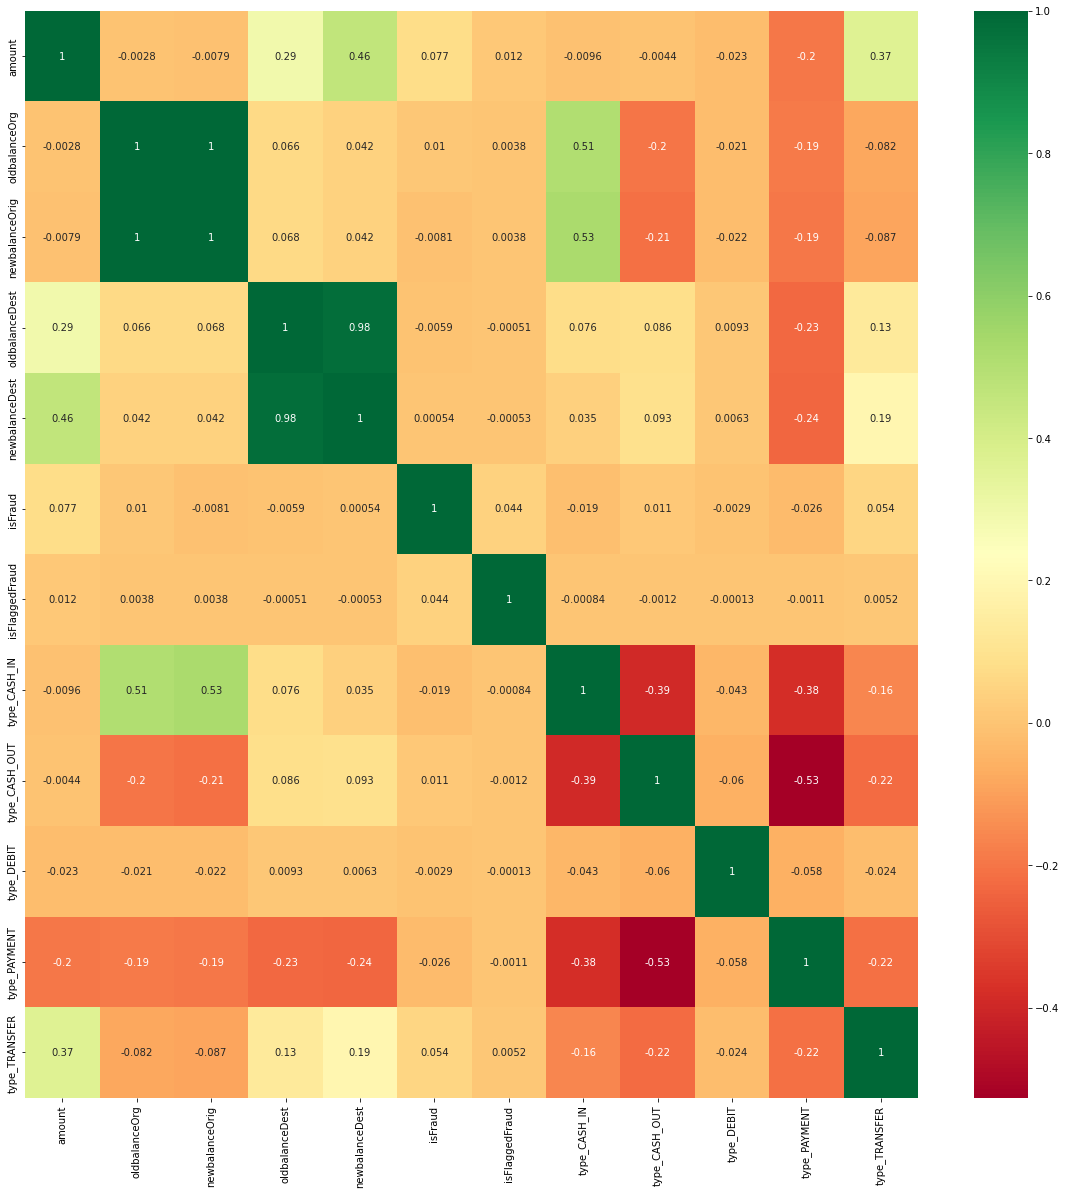

In [75]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["isFraud"]]
# Store the variable we are predicting 
target = "isFraud"
# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(636262, 12)
(636262,)


## Model Prediction





Now it is time to start building the model .The types of algorithms we are going to use to try to do anomaly detection and logistic Regression on this dataset are as follows

### Isolation Forest Algorithm :
One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

How Isolation Forests Work
The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.


### Local Outlier Factor(LOF) Algorithm
The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.


In [76]:
##Define the outlier detection methods
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error as mae
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction), 
}

In [77]:
type(classifiers)

dict

In [78]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    else:    
        clf.fit(X,Y)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 1424
Accuracy Score :
0.9977619282622567
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635443
           1       0.13      0.13      0.13       819

    accuracy                           1.00    636262
   macro avg       0.57      0.57      0.57    636262
weighted avg       1.00      1.00      1.00    636262

Local Outlier Factor: 1448
Accuracy Score :
0.9977242079520701
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635443
           1       0.12      0.12      0.12       819

    accuracy                           1.00    636262
   macro avg       0.56      0.56      0.56    636262
weighted avg       1.00      1.00      1.00    636262



In [83]:
model = LogisticRegression()
result = model.fit(X,Y)
predictions = model.predict(X)
print('Accuracy',accuracy_score(predictions,Y),':',(predictions != Y).sum())
print(classification_report(predictions,Y))
print(result.intercept_ ,' is the intercept value or bias value')
print(result.coef_ ,' are the coefficient values')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy 0.9990617072841063 : 597
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    636036
           1       0.27      0.99      0.43       226

    accuracy                           1.00    636262
   macro avg       0.64      1.00      0.71    636262
weighted avg       1.00      1.00      1.00    636262

[-10.54022424]  is the intercept value or bias value
[[ 3.85615971e-03  7.20038270e-01  9.34195057e+00 -8.83098569e+00
   6.42126034e-01 -4.44696856e+00  0.00000000e+00 -7.11737041e+00
   1.69353627e+00 -1.23777631e+00 -7.61525754e+00  4.49707925e+00]]  are the coefficient values


# Using the Logistic Regression model we can analyze which feature has the highest effect on the prediction of the model, the features that affects the predictions highly have larger coefficients so we can look at the coefficients and find which coefficient tend to have larger values using which  we can conclude that particular feature affects prediction more by looking at its corresponding weight or coefficient.

# The key factors that make a customer fradulent is the creation of an outlier or not normal or suspiciously uncommon type of transactions. These outliers(fraud transactions) are outliers of the dataset that can be identified easily with the help of anamoly detection alorithms such as we used in the program(Local Outlier Factor, Isolation factor), they tend to perform better than supervised learning algorithm as supervised algorithm can predict an outlier on the basis of data that it has previously seen which lowers its chance of predicting a new form of outlier that it might have not seen before hence unsupervised learning algorithms tend to work better in this case as they will predict a new form of outlier almost perfectly(i.e. they were not even trained on that type of outlier data)

# One of the features with the highest weights or coefficients is 'newbalanceOrig'. Increasing the newbalanceOrig will increase the chance of a large amount being transferred to a bank account which will likely make it an outlier and hence a potential candidate of fraud transanctions.

#### Observations :
- Isolation Forest detected 1432 errors versus Local Outlier Factor detecting 1448 errors versus Logistic Regression 597 erros.
- Isolation Forest has a 99.774%  accuracy, LOF is 99.772% accurate and logistic regression is 99.906% being the highest.
- So overall Logistic Regression Method performed much better in determining the fraud cases.
- We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases


# To reduce future fraud detections:
# 1. Multi-Factor Authentication
# 2. Monitor Transactions
# 3. Employ Dual, Triple Controls
# 4. Raise Fraud Awareness

# To check if the measures that are provided above have made any sufficient improvements we can collect data afterwards and check if the outlier fraction has decreased i.e. the ratio of fraud to not fraud transactions has decreased or not.